In [5]:

#import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import zipfile as zf
import os
import csv
import gc
import operator
import random
from sklearn.model_selection  import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from random import shuffle
from IPython.display import Image
from pathlib import Path

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
import keras.backend as K
from keras.models import Sequential
from keras import optimizers

#load the training data
trainData = pd.read_csv("D:/Project/whale-categorization-playground/train.csv")

#See what is in the data
trainData.sample(5)


,Image,Id
4700,7a3b61de.jpg,w_01687a8
565,0e137419.jpg,w_823fcbb
2376,3dddb6d0.jpg,w_c0daf38
4933,800a174d.jpg,w_e375961
3332,56989b51.jpg,w_1e3ce01


In [38]:
len(trainData['Id'].unique())

4251

In [39]:
trainData.shape

(9850, 2)

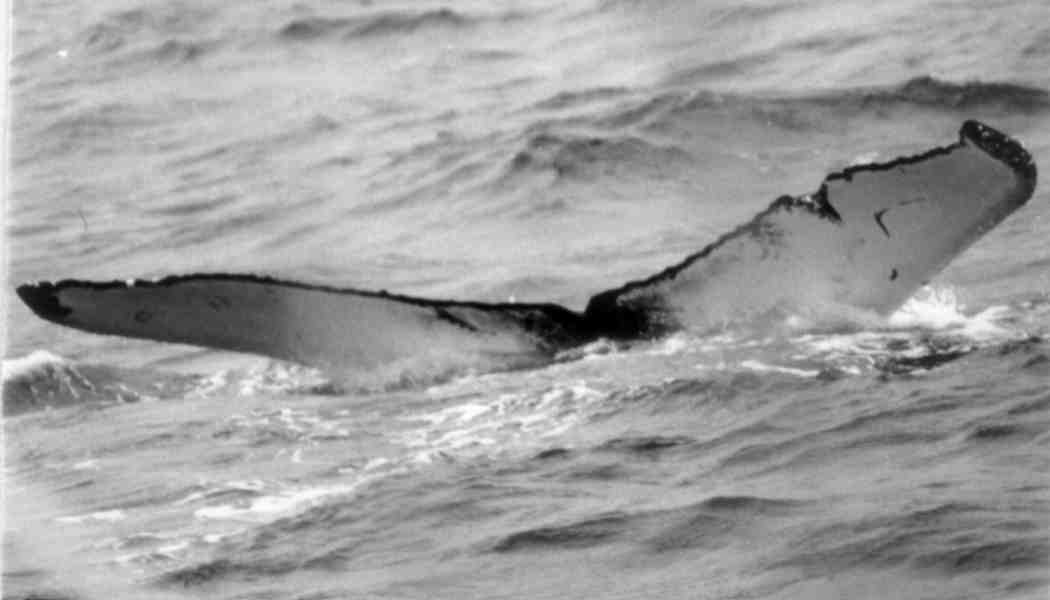

In [119]:
Image(filename="D:/Project/whale-categorization-playground/train/"+random.choice(trainData['Image'])) 

In [ ]:
CATEGORIES = ["Blue whale","Fin whale"]

In [120]:
def prepareImages(data, m, dataset):
    
    print("Preparing images")
    
    X_train = np.zeros((m, 100, 100, 3))
    class_num = CATEGORIES.index(category)
    
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("D:/Project/whale-categorization-playground/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    count = 0
    
    print("Finished!")
    
    return X_train

In [10]:
def prepareY(Y):

    values = array(Y)
    print(values.shape)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)

    y = onehot_encoded
    print(y.shape)
    return y, label_encoder

#the next lines are used to test the code and do not need to run when using it
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

In [11]:
mod = Sequential()

mod.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

mod.add(BatchNormalization(axis = 3, name = 'bn0'))
mod.add(Activation('relu'))

mod.add(MaxPooling2D((2, 2), name='max_pool'))
mod.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
mod.add(Activation('relu'))
mod.add(AveragePooling2D((3, 3), name='avg_pool'))

mod.add(Flatten())
mod.add(Dense(500, activation="relu", name='rl'))
mod.add(Dropout(0.8))
mod.add(Dense(4251, activation='softmax', name='sm'))

print(mod.output_shape)

#opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
mod.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

(None, 4251)


In [12]:
X = prepareImages(trainData, 9850, "train")

#put all the values of the training data in the range between 0 and 1
X /= 255

print("Shape X-train: ", X.shape)

Preparing images
Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg
Processing image:  7501 ,  c25a929e.jpg
Processing image:  8001 ,  cf839e92.jpg
Processing image:  8501 ,  dcfa710f.jpg
Processing image:  9001 ,  ea462ed5.jpg
Processing image:  9501 ,  f70aaa64.jpg
Finished!
Shape X-train:  (9850, 100, 100, 3)


In [13]:
Y = trainData['Id']

print("Shape Y-train: ", Y.shape)

#The next lines are used for testing - not necessary for the code
#labels = trainData['Id'].unique()
#print("Labels in data set: ", labels.shape)
#labelsTrain = Y.unique()
#print("Labels in training set: ", labelsTrain.shape)

y, label_encoder = prepareY(Y)

Shape Y-train:  (9850,)
(9850,)
[3741  310 3613 ... 2337  746 3088]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(9850, 4251)


In [95]:
label_encoder.transform(['w_a25caa9'])

array([2719], dtype=int64)

In [14]:
history = mod.fit(X, y, epochs=100, batch_size=100, verbose=1)
gc.collect()

Epoch 1/100
99/99 [==============================] - 88s 891ms/step - loss: 8.1684 - accuracy: 0.0783
Epoch 2/100
99/99 [==============================] - 88s 889ms/step - loss: 7.9025 - accuracy: 0.0822
Epoch 3/100
99/99 [==============================] - 91s 923ms/step - loss: 7.8277 - accuracy: 0.0822
Epoch 4/100
99/99 [==============================] - 89s 896ms/step - loss: 7.7332 - accuracy: 0.0822
Epoch 5/100
99/99 [==============================] - 89s 896ms/step - loss: 7.6279 - accuracy: 0.0822
Epoch 6/100
99/99 [==============================] - 88s 890ms/step - loss: 7.5213 - accuracy: 0.0823
Epoch 7/100
99/99 [==============================] - 90s 905ms/step - loss: 7.3842 - accuracy: 0.0822
Epoch 8/100
99/99 [==============================] - 88s 888ms/step - loss: 7.2254 - accuracy: 0.0820
Epoch 9/100
99/99 [==============================] - 88s 893ms/step - loss: 7.0198 - accuracy: 0.0828
Epoch 10/100
99/99 [==============================] - 87s 882ms/step - loss: 6.763

2264

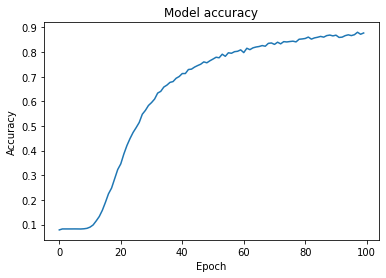

In [18]:
import matplotlib.pyplot as plt
#plot how the accuracy changes as the model was trained
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [121]:
#open test data
test = os.listdir("D:/Project/whale-categorization-playground/mytest/")
print(len(test))

#separate data into different DataFrames due to memory constraints
col = ['Image']
testData1 = pd.DataFrame(test[0:1], columns=col)
print(testData1)

1
          Image
0  39c8a23b.jpg


In [122]:
gc.collect()
X = prepareImages(testData1, 1, "mytest")
X /= 255

Preparing images
Processing image:  1 ,  39c8a23b.jpg
Finished!


In [123]:
pred = mod.predict(np.array(X), verbose=1)
len(pred)

1/1 [==============================] - 0s 8ms/step


1

In [124]:
pred.shape

(1, 4251)

In [125]:
pred.argmax()

0

In [126]:
pred.max()

0.9928058

In [127]:
pred[0]

array([9.9280578e-01, 9.6650077e-11, 1.5414529e-14, ..., 1.0663505e-12,
       5.3574399e-07, 2.7545099e-12], dtype=float32)